## Challenge: what test to use
Use the [European Social Survey](http://www.europeansocialsurvey.org/data/round-index.html) to address the following questions. The same participants answered questions in 2012 and again in 2014.

[Raw data](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv)

[Variable coding and content](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [3]:
path = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv'
df = pd.read_csv(path)
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample

In [14]:
print(df['cntry'].value_counts())

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64


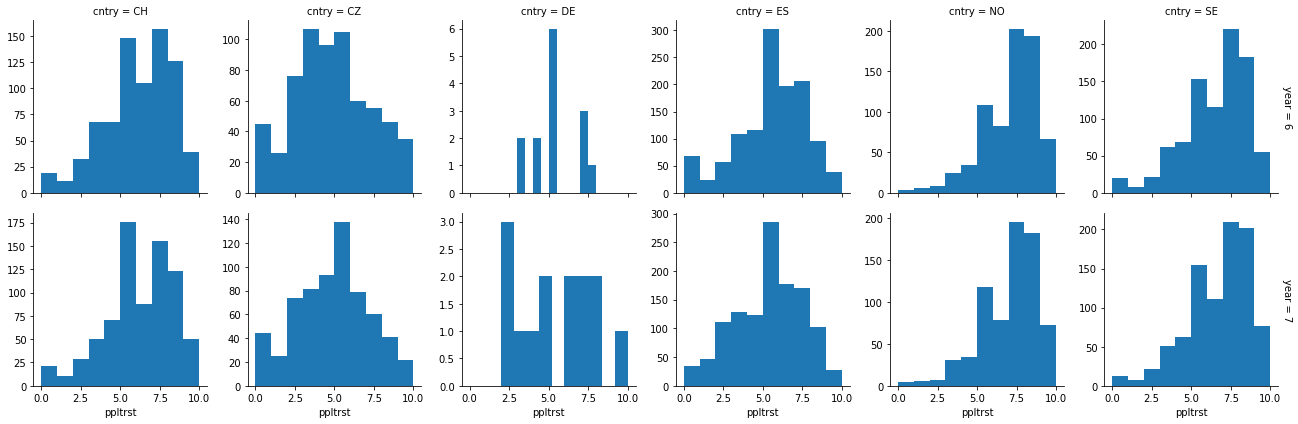

In [32]:
g = sns.FacetGrid(data=df,
                  row='year',
                  col='cntry',
                  margin_titles=True,
                  dropna=True,
                  sharey=False)

g.map(plt.hist, 'ppltrst')
plt.show()

In [59]:
# wilcoxon signed-rank for a/b test where participants did both versions
for cntry in df['cntry'].unique():
    x = df.loc[(df['year'] == 6) & (df['cntry'] == cntry), 'ppltrst']
    y = df.loc[(df['year'] == 7) & (df['cntry'] == cntry), 'ppltrst']
    result = stats.wilcoxon(x=x,
                            y=y,
                            zero_method='wilcox',
                            correction=False)
    print('\nTrust results for {}'.format(cntry))
    print('Mean 2012: {}'.format(np.mean(x)))
    print('Mean 2014: {}'.format(np.mean(y)))
    print(result)
    if cntry == 'DE':
        print(stats.kruskal(x, y))
    
# also try a nonparametric for DE
# since small sample size and normal is questionable

#de_ranks_2012 = stats.rankdata(df.loc[(df['year'] == 6) & (df['cntry'] == 'DE'), 'ppltrst'])
#de_ranks_2014 = stats.rankdata(df.loc[(df['year'] == 7) & (df['cntry'] == 'DE'), 'ppltrst'])

#print('\nDE nonparametric')
#print(stats.kruskal(de_ranks_2012, de_ranks_2014))


Trust results for CH
Mean 2012: 5.677878395860285
Mean 2014: 5.751617076326003
WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)

Trust results for CZ
Mean 2012: 4.362519201228879
Mean 2014: 4.424657534246576
WilcoxonResult(statistic=82837.0, pvalue=0.2931891426327379)

Trust results for DE
Mean 2012: 5.214285714285714
Mean 2014: 5.357142857142857
WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)
KruskalResult(statistic=0.03493591039585809, pvalue=0.8517300191250199)

Trust results for ES
Mean 2012: 5.114591920857379
Mean 2014: 4.895127993393889
WilcoxonResult(statistic=243475.5, pvalue=0.005570829650439684)

Trust results for NO
Mean 2012: 6.64931506849315
Mean 2014: 6.598630136986301
WilcoxonResult(statistic=85392.0, pvalue=0.6139175669970661)

Trust results for SE
Mean 2012: 6.058498896247241
Mean 2014: 6.257709251101321
WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)


/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


**Results**: given the range of answers 0-10 of H values between ~82xxx and ~24xxxx
- Significant change
    - ES (Spain): significant decrease in trust, mean went down about .2
    - SE (Sweden): significant increase in trust, mean went up about .2


- No significant change
    - CH (Switzerland): non significant pval = .44
    - CZ (Czech Republic): non significant pval = .29
    - DE (Denmark):  non significant pval = .91, .85
    - NO (Norway): non significant pval = .61